In [3]:
!pip install numpy
!pip install keras
!pip install pillow
!pip install tdqm
!pip install tensorflow

In [4]:
!pip install keras.utils
!pip install pandas


In [5]:
import string
from PIL import Image
import os
from pickle import dump, load
import numpy as np
import tensorflow as tf

from keras.applications.xception import Xception, preprocess_input
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
from keras.layers import add
from keras.models import Model, load_model
from keras.layers import Input, Dense, LSTM, Embedding, Dropout

# small library for seeing the progress of loops.
from tqdm.notebook import tqdm
tqdm().pandas()

0it [00:00, ?it/s]

In [6]:
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import pad_sequences

In [7]:
#PREPROCESSING

# Loading a text file into memory
def load_doc(filename):
    # Opening the file as read only
    file = open(filename, 'r')
    text = file.read()
    file.close()
    return text

# get all imgs with their captions
def all_img_captions(filename):
    file = load_doc(filename)
    captions = file.split('\n')
    descriptions ={}
    for caption in captions[:-1]:
        img, caption = caption.split('\t')
        if img[:-2] not in descriptions:
            descriptions[img[:-2]] = [ caption ]
        else:
            descriptions[img[:-2]].append(caption)
    return descriptions

#Data cleaning- lower casing, removing puntuations and words containing numbers
def cleaning_text(captions):
    table = str.maketrans('','',string.punctuation)
    for img,caps in captions.items():
        for i,img_caption in enumerate(caps):

            img_caption.replace("-"," ")
            desc = img_caption.split()

            #converts to lowercase
            desc = [word.lower() for word in desc]
            #remove punctuation from each token
            desc = [word.translate(table) for word in desc]
            #remove hanging 's and a
            desc = [word for word in desc if(len(word)>1)]
            #remove tokens with numbers in them
            desc = [word for word in desc if(word.isalpha())]
            #convert back to string

            img_caption = ' '.join(desc)
            captions[img][i]= img_caption
    return captions

def text_vocabulary(descriptions):
    # build vocabulary of all unique words
    vocab = set()

    for key in descriptions.keys():
        [vocab.update(d.split()) for d in descriptions[key]]

    return vocab

#All descriptions in one file
def save_descriptions(descriptions, filename):
    lines = list()
    for key, desc_list in descriptions.items():
        for desc in desc_list:
            lines.append(key + '\t' + desc )
    data = "\n".join(lines)
    file = open(filename,"w")
    file.write(data)
    file.close()

#we prepare our text data

filename = "V:\\Industrail Internship\\Smart Knower\\Project\\Image_Caption_Generator_AI-main\\Flickr8k_text\\Flickr8k.token.txt"

#loading the file that contains all data
#mapping them into descriptions dictionary img to 5 captions
descriptions = all_img_captions(filename)
print("Length of descriptions =" ,len(descriptions))

#cleaning the descriptions
clean_descriptions = cleaning_text(descriptions)

#building vocabulary
vocabulary = text_vocabulary(clean_descriptions)
print("Length of vocabulary = ", len(vocabulary))

#saving each description to file
save_descriptions(clean_descriptions, "descriptions.txt")

Length of descriptions = 8092
Length of vocabulary =  8763


In [8]:
dataset_images = "V:\\Industrail Internship\\Smart Knower\\Project\\Image_Caption_Generator_AI-main\\Flickr8k_Dataset\\Flicker8k_Dataset"
def extract_features(directory):
        model = Xception( include_top=False, pooling='avg' )
        features = {}
        for img in tqdm(os.listdir(directory)):
            filename = directory + "/" + img
            image = Image.open(filename)
            image = image.resize((299,299))
            image = np.expand_dims(image, axis=0)
            #image = preprocess_input(image)
            image = image/127.5
            image = image - 1.0

            feature = model.predict(image)
            features[img] = feature
        return features

#2048 feature vector
features = extract_features(dataset_images)
dump(features, open("features.p","wb"))

  0%|          | 0/8091 [00:00<?, ?it/s]

1/1 [==============================] - 0s 247ms/step


1/1 [==============================] - 0s 282ms/step


1/1 [==============================] - 0s 183ms/step


1/1 [==============================] - 0s 266ms/step


1/1 [==============================] - 0s 236ms/step


1/1 [==============================] - 0s 172ms/step


1/1 [==============================] - 0s 222ms/step


1/1 [==============================] - 0s 230ms/step


1/1 [==============================] - 0s 282ms/step


1/1 [==============================] - 0s 248ms/step


1/1 [==============================] - 0s 270ms/step


1/1 [==============================] - 0s 214ms/step


1/1 [==============================] - 0s 246ms/step


1/1 [==============================] - 0s 205ms/step


1/1 [==============================] - 0s 234ms/step


1/1 [==============================] - 0s 203ms/step


1/1 [==============================] - 0s 251ms/step


1/1 [==============================] - 0s 201ms/step


1/1 [==============================] - 0s 193ms/step


1/1 [==============================] - 0s 263ms/step


1/1 [==============================] - 0s 238ms/step


1/1 [==============================] - 0s 255ms/step


1/1 [==============================] - 0s 263ms/step


1/1 [==============================] - 0s 232ms/step


1/1 [==============================] - 0s 177ms/step


1/1 [==============================] - 0s 185ms/step


1/1 [==============================] - 0s 276ms/step


1/1 [==============================] - 0s 214ms/step


1/1 [==============================] - 0s 209ms/step


1/1 [==============================] - 0s 234ms/step


1/1 [==============================] - 0s 172ms/step


1/1 [==============================] - 0s 274ms/step


1/1 [==============================] - 0s 225ms/step


1/1 [==============================] - 0s 215ms/step


1/1 [==============================] - 0s 268ms/step


1/1 [==============================] - 0s 257ms/step


1/1 [==============================] - 0s 279ms/step


1/1 [==============================] - 0s 263ms/step


1/1 [==============================] - 0s 229ms/step


1/1 [==============================] - 0s 211ms/step


1/1 [==============================] - 0s 253ms/step


1/1 [==============================] - 0s 242ms/step


1/1 [==============================] - 0s 209ms/step


1/1 [==============================] - 0s 271ms/step


1/1 [==============================] - 0s 246ms/step


1/1 [==============================] - 0s 177ms/step


1/1 [==============================] - 0s 204ms/step


1/1 [==============================] - 0s 299ms/step


1/1 [==============================] - 0s 275ms/step


1/1 [==============================] - 0s 238ms/step


1/1 [==============================] - 0s 216ms/step


1/1 [==============================] - 0s 238ms/step


1/1 [==============================] - 0s 222ms/step


In [9]:
#load the data
def load_photos(filename):
    file = load_doc(filename)
    photos = file.split("\n")[:-1]
    return photos


def load_clean_descriptions(filename, photos):
    #loading clean_descriptions
    file = load_doc(filename)
    descriptions = {}
    for line in file.split("\n"):

        words = line.split()
        if len(words)<1 :
            continue

        image, image_caption = words[0], words[1:]

        if image in photos:
            if image not in descriptions:
                descriptions[image] = []
            desc = '<start> ' + " ".join(image_caption) + ' <end>'
            descriptions[image].append(desc)

    return descriptions


def load_features(photos):
    #loading all features
    all_features = load(open("features.p","rb"))
    #selecting only needed features
    features = {k:all_features[k] for k in photos}
    return features


filename = "D:/Downloads/Flickr8k/Flickr_8k.trainImages.txt"

#train = loading_data(filename)
train_imgs = load_photos(filename)
train_descriptions = load_clean_descriptions("descriptions.txt", train_imgs)
train_features = load_features(train_imgs)
print('Descriptions: train=', len(train_descriptions))

fname = "D:/Downloads/Flickr8k/Flickr_8k.testImages.txt"
test_imgs = load_photos(fname)
test_descriptions = load_clean_descriptions("descriptions.txt", test_imgs)
test_features = load_features(test_imgs)
print('Descriptions: train=', len(train_descriptions))

Descriptions: train= 6000
Descriptions: train= 6000


In [10]:
#converting dictionary to clean list of descriptions
def dict_to_list(descriptions):
    all_desc = []
    for key in descriptions.keys():
        [all_desc.append(d) for d in descriptions[key]]
    return all_desc

#creating tokenizer class
#this will vectorise text corpus
#each integer will represent token in dictionary

from keras.preprocessing.text import Tokenizer

def create_tokenizer(descriptions):
    desc_list = dict_to_list(descriptions)
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(desc_list)
    return tokenizer

# give each word an index, and store that into tokenizer.p pickle file
tokenizer = create_tokenizer(train_descriptions)
dump(tokenizer, open('tokenizer.p', 'wb'))
vocab_size = len(tokenizer.word_index) + 1
vocab_size

7577

In [11]:
#calculate maximum length of descriptions
def max_length(descriptions):
    desc_list = dict_to_list(descriptions)
    return max(len(d.split()) for d in desc_list)

max_length = max_length(descriptions)
max_length

32

In [12]:
#create input-output sequence pairs from the image description.

#data generator, used by model.fit_generator()
def data_generator(descriptions, features, tokenizer, max_length):
    while 1:
        for key, description_list in descriptions.items():
            #retrieve photo features
            feature = features[key][0]
            input_image, input_sequence, output_word = create_sequences(tokenizer, max_length, description_list, feature)
            yield [[input_image, input_sequence], output_word]

def create_sequences(tokenizer, max_length, desc_list, feature):
    X1, X2, y = list(), list(), list()
    # walk through each description for the image
    for desc in desc_list:
        # encode the sequence
        seq = tokenizer.texts_to_sequences([desc])[0]
        # split one sequence into multiple X,y pairs
        for i in range(1, len(seq)):
            # split into input and output pair
            in_seq, out_seq = seq[:i], seq[i]
            # pad input sequence
            in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
            # encode output sequence
            out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]
            # store
            X1.append(feature)
            X2.append(in_seq)
            y.append(out_seq)
    return np.array(X1), np.array(X2), np.array(y)

#You can check the shape of the input and output for your model
[a,b],c = next(data_generator(train_descriptions, features, tokenizer, max_length))
a.shape, b.shape, c.shape
#((47, 2048), (47, 32), (47, 7577))

((47, 2048), (47, 32), (47, 7577))

In [13]:
from keras.utils import plot_model

# define the captioning model
def define_model(vocab_size, max_length):

    # features from the CNN model squeezed from 2048 to 256 nodes
    inputs1 = Input(shape=(2048,))
    fe1 = Dropout(0.5)(inputs1)
    fe2 = Dense(256, activation='relu')(fe1)

    # LSTM sequence model
    inputs2 = Input(shape=(max_length,))
    se1 = Embedding(vocab_size, 256, mask_zero=True)(inputs2)
    se2 = Dropout(0.5)(se1)
    se3 = LSTM(256)(se2)

    # Merging both models
    decoder1 = add([fe2, se3])
    decoder2 = Dense(256, activation='relu')(decoder1)
    outputs = Dense(vocab_size, activation='softmax')(decoder2)

    # tie it together [image, seq] [word]
    model = Model(inputs=[inputs1, inputs2], outputs=outputs)
    model.compile(loss='categorical_crossentropy', optimizer='adam')

    # summarize model
    print(model.summary())
    plot_model(model, to_file='model.png', show_shapes=True)

    return model

In [14]:
# train our model
print('Dataset: ', len(train_imgs))
print('Descriptions: train=', len(train_descriptions))
print('Photos: train=', len(train_features))
print('Vocabulary Size:', vocab_size)
print('Description Length: ', max_length)


Dataset:  6000
Descriptions: train= 6000
Photos: train= 6000
Vocabulary Size: 7577
Description Length:  32


In [15]:
model = define_model(vocab_size, max_length)
epochs = 2
steps = len(train_descriptions)
# making a directory models to save our models
os.mkdir("model")
for i in range(epochs):
    generator = data_generator(train_descriptions, train_features, tokenizer, max_length)
    model.fit_generator(generator, epochs=1, steps_per_epoch= steps, verbose=1)
    model.save("models/model_" + str(i) + ".h5")

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 32)]         0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 2048)]       0           []                               
                                                                                                  
 embedding (Embedding)          (None, 32, 256)      1939712     ['input_3[0][0]']                
                                                                                                  
 dropout (Dropout)              (None, 2048)         0           ['input_2[0][0]']                
                                                                                              

C:\Users\Santhosh\AppData\Local\Temp\ipykernel_38272\693419832.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator, epochs=1, steps_per_epoch= steps, verbose=1)


6000/6000 [==============================] - 1956s 326ms/step - loss: 3.6773


In [16]:
def evaluate_model(model, descriptions, photos, tokenizer, max_length):
    actual, predicted = list(), list()
    for key, desc_list in descriptions.items():
        prediction = generate_desc(model, tokenizer, photos[key], max_length)
        actual_desc = [d.split() for d in desc_list]
        actual.append(actual_desc)
        predicted.append(prediction.split())

    print('BLEU-1: ', corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0)))
    print('BLEU-2: ', corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0)))
    print('BLEU-3: ', corpus_bleu(actual, predicted, weights=(0.3, 0.3, 0.3, 0)))
    print('BLEU-4: ', corpus_bleu(actual, predicted, weights=(0.25, 0.25, 0.25, 0.25)))
    
    

# Function for loading a pre-defined list of photo identifiers
def load_photo_identifiers(filename):
    
    # Loading the file containing the list of photo identifier
    file = load_file(filename)
    
    # Creating a list for storing the identifiers
    photos = list()
    
    # Traversing the file one line at a time
    for line in file.split('\n'):
        if len(line) < 1:
            continue
        
        # Image name contains the extension as well but we need just the name
        identifier = line.split('.')[0]
        
        # Adding it to the list of photos
        photos.append(identifier)
        
    # Returning the set of photos created
    return set(photos)

1/1 [==============================] - 2s 2s/step



start boy is playing in the water end


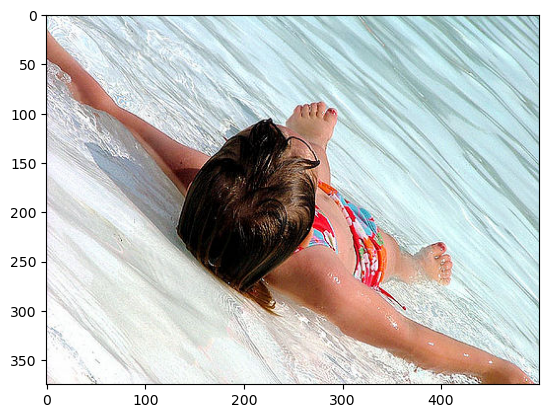

In [17]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Update the image path here
img_path = "D:/Downloads/Flickr8k/Images/667626_18933d713e.jpg"

def extract_features(filename, model):
    try:
        image = Image.open(filename)
    except:
        print("ERROR: Couldn't open image! Make sure the image path and extension are correct")
        return None
    image = image.resize((299, 299))
    image = np.array(image)
    if image.shape[2] == 4:
        image = image[..., :3]
    image = np.expand_dims(image, axis=0)
    image = image / 127.5
    image = image - 1.0
    feature = model.predict(image)
    return feature

def word_for_id(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None

def generate_desc(model, tokenizer, photo, max_length):
    in_text = 'start'
    for _ in range(max_length):
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        sequence = pad_sequences([sequence], maxlen=max_length)
        pred = model.predict([photo, sequence], verbose=0)
        pred = np.argmax(pred)
        word = word_for_id(pred, tokenizer)
        if word is None:
            break
        in_text += ' ' + word
        if word == 'end':
            break
    return in_text

max_length = 32
tokenizer = load(open("tokenizer.p","rb"))
model = load_model('models/model_1.h5')
xception_model = Xception(include_top=False, pooling="avg")

photo = extract_features(img_path, xception_model)
img = Image.open(img_path)

description = generate_desc(model, tokenizer, photo, max_length)
print("\n\n")
print(description)
plt.imshow(img)


1/1 [==============================] - 0s 219ms/step



start man in red shirt is walking through the snow end


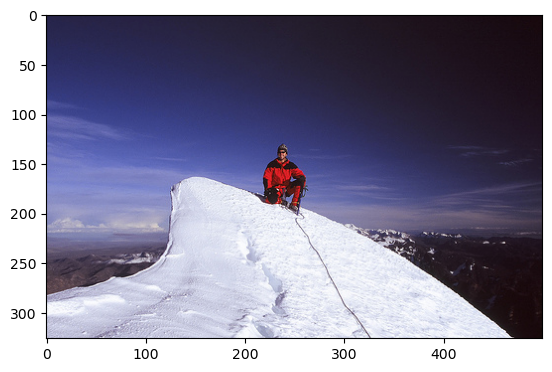

In [18]:

# Update the image path here
img_path = "D:/Downloads/Flickr8k/Images/55473406_1d2271c1f2.jpg"
photo = extract_features(img_path, xception_model)
img = Image.open(img_path)

description = generate_desc(model, tokenizer, photo, max_length)
print("\n\n")
print(description)
plt.imshow(img)


1/1 [==============================] - 0s 275ms/step



start man in red shirt is walking through the snow end


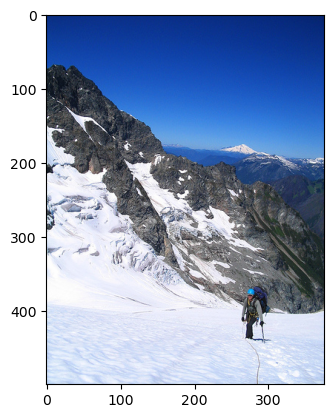

In [19]:
img_path = "D:/Downloads/Flickr8k/Images/58363930_0544844edd.jpg"
photo = extract_features(img_path, xception_model)
img = Image.open(img_path)

description = generate_desc(model, tokenizer, photo, max_length)
print("\n\n")
print(description)
plt.imshow(img)

1/1 [==============================] - 0s 285ms/step



start boy is jumping into the air end


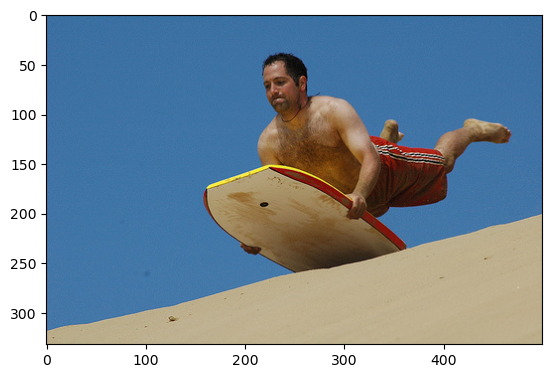

In [20]:
img_path = "D:/Downloads/Flickr8k/Images/96420612_feb18fc6c6.jpg"
photo = extract_features(img_path, xception_model)
img = Image.open(img_path)

description = generate_desc(model, tokenizer, photo, max_length)
print("\n\n")
print(description)
plt.imshow(img)

1/1 [==============================] - 0s 201ms/step



start man in red shirt and black and white and white and white and white and white hair and black hair and white hair and black hair and white hair and black hair


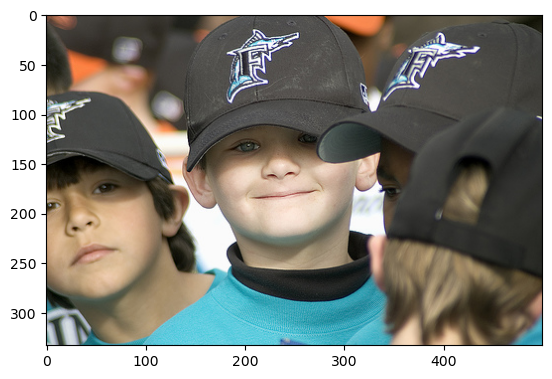

In [21]:
img_path = "D:/Downloads/Flickr8k/Images/118309463_a532b75be9.jpg"
photo = extract_features(img_path, xception_model)
img = Image.open(img_path)

description = generate_desc(model, tokenizer, photo, max_length)
print("\n\n")
print(description)
plt.imshow(img)

1/1 [==============================] - 0s 252ms/step



start two dogs are playing in the grass end


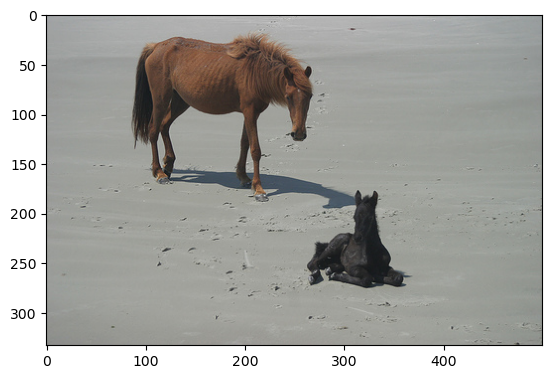

In [22]:
img_path = "D:/Downloads/Flickr8k/Images/124195430_d14028660f.jpg"
photo = extract_features(img_path, xception_model)
img = Image.open(img_path)

description = generate_desc(model, tokenizer, photo, max_length)
print("\n\n")
print(description)
plt.imshow(img)

1/1 [==============================] - 0s 192ms/step



start man is sitting on the beach with the water end


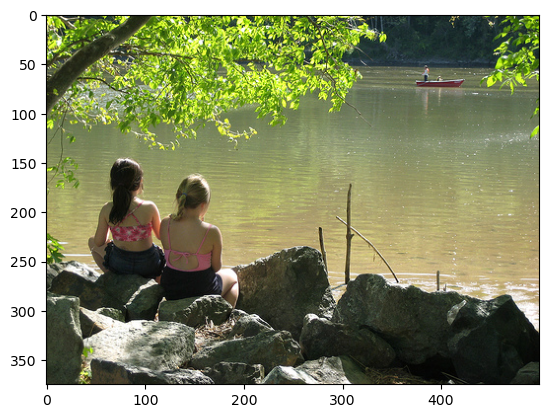

In [23]:
img_path = "D:/Downloads/Flickr8k/Images/138705546_be7a6845dd.jpg"
photo = extract_features(img_path, xception_model)
img = Image.open(img_path)

description = generate_desc(model, tokenizer, photo, max_length)
print("\n\n")
print(description)
plt.imshow(img)

1/1 [==============================] - 0s 211ms/step



start man in red shirt is riding bike on the street end


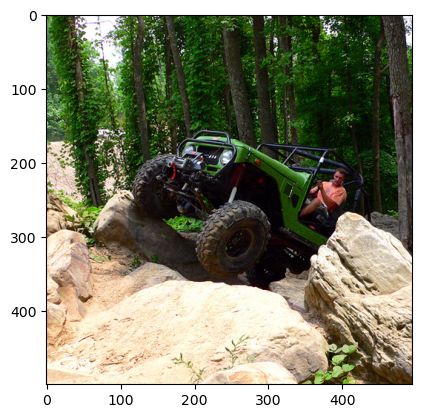

In [24]:
img_path = 'D:/Downloads/Flickr8k/Images/185972340_781d60ccfd.jpg'
photo = extract_features(img_path, xception_model)
img = Image.open(img_path)

description = generate_desc(model, tokenizer, photo, max_length)
print("\n\n")
print(description)
plt.imshow(img)


In [27]:
def evaluate_model(model, descriptions, photos, tokenizer, max_length):
    actual, predicted = list(), list()
    for key, desc_list in descriptions.items():
        prediction = generate_desc(model, tokenizer, photos[key], max_length)
        actual_desc = [d.split() for d in desc_list]
        actual.append(actual_desc)
        predicted.append(prediction.split())

    print('BLEU-1: ', corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0)))
    print('BLEU-2: ', corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0)))
    print('BLEU-3: ', corpus_bleu(actual, predicted, weights=(0.3, 0.3, 0.3, 0)))
    print('BLEU-4: ', corpus_bleu(actual, predicted, weights=(0.25, 0.25, 0.25, 0.25)))
    
    

# Function for loading a pre-defined list of photo identifiers
def load_photo_identifiers(filename):
    
    # Loading the file containing the list of photo identifier
    file = load_doc(filename)
    
    # Creating a list for storing the identifiers
    photos = list()
    
    # Traversing the file one line at a time
    for line in file.split('\n'):
        if len(line) < 1:
            continue
        
        # Image name contains the extension as well but we need just the name
        identifier = line.split('.')[0]
        
        # Adding it to the list of photos
        photos.append(identifier)
        
    # Returning the set of photos created
    return set(photos)

In [28]:
filename = 'D:/Downloads/Flickr8k/Flickr_8k.trainImages.txt'
train = load_photo_identifiers(filename)
print('Dataset: ', len(train))


Dataset:  6000


In [29]:
print('Descriptions: train=', len(train_descriptions))

Descriptions: train= 6000


In [30]:
vocab_size


7577

In [33]:
print('Description Length: ,', max_length)

Description Length: , 32


In [34]:
filename = 'D:/Downloads/Flickr8k/Flickr_8k.testImages.txt'
test = load_photo_identifiers(filename)

print('Dataset: ', len(test))


Dataset:  1000


In [35]:

print('Descriptions: test=', len(test_descriptions))

Descriptions: test= 1000


In [36]:
from nltk.translate.bleu_score import corpus_bleu

In [37]:
filename = 'models/model_1.h5'
model = load_model(filename)
evaluate_model(model, test_descriptions, test_features, tokenizer, max_length)

BLEU-1:  0.3591185690577171
BLEU-2:  0.1956967732171209
BLEU-3:  0.1310410295085308
BLEU-4:  0.05568394403114185
